In [2]:
from sklearn import svm
svc = svm.SVC(gamma=0.001,C=100.) 

In [3]:
from sklearn import datasets
digits = datasets.load_digits()

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [6]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

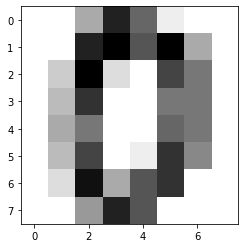

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(digits.images[0],cmap=plt.cm.gray_r,interpolation='nearest')

In [11]:
digits.target 

array([0, 1, 2, ..., 8, 9, 8])

In [12]:
digits.target.size

1797

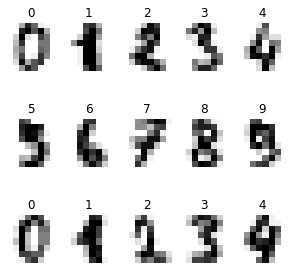

In [15]:
images_and_labels = list(zip(digits.images,digits.target))
plt.figure(figsize=(5,5))
for index,(image,label) in enumerate(images_and_labels[:15]):
    plt.subplot(3,5,index + 1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('%i' % label)

In [16]:
n_samples = len(digits.images)
print(n_samples)

1797


In [20]:
x = digits.images.reshape((n_samples, -1))
y = digits.target

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y)
print(X_train.shape)
print(X_test.shape)

(1347, 64)
(450, 64)


Case 1:Define Support Vector classifier model with linear kernel

In [25]:
from sklearn import svm
model_linear =svm.SVC(kernel='linear',degree=3,gamma='scale')
model_linear.fit(X_train,y_train)
y_pred = model_linear.predict(X_test)

In [26]:
model_linear.score(X_test,y_test)

0.9866666666666667

cases 2:kernel type RBF

In [27]:
model_rbf = svm.SVC(degree=3,gamma='scale',kernel='rbf')
model_rbf.fit(X_train,y_train)
y_pred = model_rbf.predict(X_test)

In [28]:
model_rbf.score(X_test,y_test)

0.9888888888888889

Case 3:Check for prediction from dataset

In [30]:
from sklearn.metrics import classification_report
predictions = model_linear.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      1.00      0.99        41
           2       1.00      1.00      1.00        39
           3       0.98      0.98      0.98        47
           4       1.00      0.98      0.99        43
           5       0.95      0.97      0.96        39
           6       1.00      1.00      1.00        44
           7       1.00      1.00      1.00        50
           8       0.98      0.98      0.98        44
           9       0.98      0.96      0.97        53

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

